In [1]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

# Tratamento dos dados de entrada

In [2]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
dicionario_nomes = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados = dados.rename(columns=dicionario_nomes)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
dicionario_vendido = {
    'yes': 1,
    'no': 0
}
dados.vendido = dados.vendido.map(dicionario_vendido)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime
ano_atual = datetime.today().year
print(f'ano_atual = {ano_atual}')

ano_atual = 2022


In [6]:
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [7]:
km_por_milha = 1.60934
dados['km_por_ano'] = dados.milhas_por_ano * km_por_milha
dados.km_por_ano = dados.km_por_ano.map(lambda x: round(x,2))
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22
1,1,7843,1998,40557.96,1,24,12622.05
2,2,7109,2006,89627.50,0,16,11440.80
3,3,26823,2015,95276.14,0,7,43167.33
4,4,7935,2014,117384.68,1,8,12770.11


In [8]:
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22
1,40557.96,1,24,12622.05
2,89627.50,0,16,11440.80
3,95276.14,0,7,43167.33
4,117384.68,1,8,12770.11


# Treinamento de um modelo linear de ML

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [10]:
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [11]:
def mostrar_acuracia(teste_y, predicao_y):
  acuracia = accuracy_score(teste_y, predicao_y)
  print(f'Acurácia = {acuracia * 100:.2f}%')

In [12]:
X = dados[['idade_do_modelo','km_por_ano','preco']]
y = dados[['vendido']]

In [13]:
# separando os dados em treino e teste
raw_treino_X, raw_teste_X, treino_y, teste_y = train_test_split(X, y, 
                                                        train_size=0.8, 
                                                        stratify=y)

In [14]:
modelo_svc = LinearSVC(max_iter=10000)

modelo_svc.fit(raw_treino_X, pd.Series.ravel(treino_y))
predicao_y = modelo_svc.predict(raw_teste_X)

mostrar_acuracia(teste_y, predicao_y)

Acurácia = 46.55%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Estabelecendo um baseline

In [15]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(raw_treino_X, pd.Series.ravel(treino_y))
predicao_y = dummy.predict(raw_teste_X)

mostrar_acuracia(teste_y, predicao_y)

Acurácia = 52.25%


In [16]:
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(raw_treino_X, pd.Series.ravel(treino_y))
acuracia = dummy_mf.score(raw_teste_X, pd.Series.ravel(teste_y)) * 100

print(f'A acurácia foi de {acuracia:.2f}%')

A acurácia foi de 58.00%


## Testando o SVC

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(raw_treino_X)
treino_X = scaler.transform(raw_treino_X)
teste_X = scaler.transform(raw_teste_X)

modelo = SVC(gamma='auto')
modelo.fit(treino_X, pd.Series.ravel(treino_y))
predicao_y = modelo.predict(teste_X)

mostrar_acuracia(teste_y, predicao_y)

Acurácia = 75.90%


## Testando Árvore de Decisão

In [18]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_X, pd.Series.ravel(treino_y))
predicao_y = modelo.predict(raw_teste_X)

mostrar_acuracia(teste_y, predicao_y)

Acurácia = 78.10%


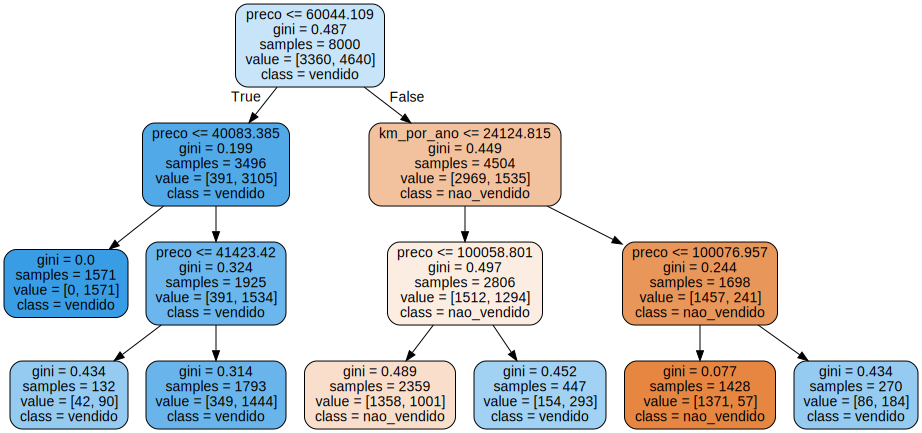

In [19]:
import graphviz
from sklearn.tree import export_graphviz

pontos_grafico = export_graphviz(modelo, 
                                 out_file=None, 
                                 rounded=True,
                                 filled=True,
                                 feature_names=raw_treino_X.columns,
                                 class_names=['nao_vendido','vendido'])
grafico = graphviz.Source(pontos_grafico)
display(grafico)